In [ ]:
import os
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import pipeline
from pdfminer.high_level import extract_text

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# 1. Dataset Preprocessing
def extract_text_from_pdf(file_path):
    """Extracts text from a PDF file."""
    return extract_text(file_path)

def clean_text(text):
    """Removes special characters and normalizes text."""
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9.\?\!\s]', '', text)
    return text.lower()

# 2. Chunking and Feature Extraction
def split_into_chunks(text, chunk_size=1000):
    """Splits the text into chunks of approximately the specified size."""
    words = text.split()
    chunks = [' '.join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]
    return chunks

def get_important_sentences(text, top_n=10):
    """Identifies important sentences using TF-IDF."""
    sentences = sent_tokenize(text)
    vectorizer = TfidfVectorizer(stop_words='english')
    vectors = vectorizer.fit_transform(sentences)
    scores = vectors.sum(axis=1).flatten().tolist()
    sentence_scores = [(score, sentence) for score, sentence in zip(scores, sentences)]
    sentence_scores.sort(key=lambda x: x[0], reverse=True)
    summary = [sentence for _, sentence in sentence_scores[:top_n]]  # Top N sentences
    return ' '.join(summary)

# 3. Abstractive Summarization
def abstractive_summarizer(text, model_name='facebook/bart-large-cnn', max_chunk_size=512):
    """Summarizes text using a pre-trained transformer model."""
    summarizer = pipeline("summarization", model=model_name, device=0)  # Use CPU or GPU
    sentences = sent_tokenize(text)

    # Split sentences into chunks fitting within the model's token limit
    chunks = []
    current_chunk = []
    current_length = 0

    for sentence in sentences:
        sentence_length = len(sentence.split())
        if current_length + sentence_length <= max_chunk_size:
            current_chunk.append(sentence)
            current_length += sentence_length
        else:
            chunks.append(" ".join(current_chunk))
            current_chunk = [sentence]
            current_length = sentence_length

    if current_chunk:  # Add any remaining sentences as the last chunk
        chunks.append(" ".join(current_chunk))

    # Summarize each chunk and combine results
    summaries = []
    for i, chunk in enumerate(chunks):
        print(f"Processing Chunk {i + 1}: {chunk[:200]}...")
        try:
            summary = summarizer(chunk, max_length=300, min_length=100, do_sample=False)
            summaries.append(summary[0]['summary_text'])
        except Exception as e:
            print(f"Error in chunk {i + 1}: {e}")
            summaries.append(f"Error summarizing chunk {i + 1}: {e}")

    return " ".join(summaries)

# Main Execution
def main():
    pdf_file_path = "507 Submission.pdf"  # Replace with your file path

    # Step 1: Extract and Clean Text
    raw_text = extract_text_from_pdf(pdf_file_path)
    cleaned_text = clean_text(raw_text)

    # Step 2: Chunk and Summarize
    chunks = split_into_chunks(cleaned_text, chunk_size=1500)
    extractive_summary = []
    abstractive_summary = []

    for i, chunk in enumerate(chunks):
        print(f"\nProcessing Chunk {i + 1}:\n")
        extractive_summary.append(get_important_sentences(chunk, top_n=15))  # Extract 15 sentences per chunk
        abstractive_summary.append(abstractive_summarizer(chunk))
        print("="*50)
        print(f"Chunk {i+1}:")
        print(f"Word Count: {len(chunk.split())}")
        print(f"Extractive Summary:\n{extractive_summary[-1]}")
        print(f"Abstractive Summary:\n{abstractive_summary[-1]}")
        print("="*50)


    # Combine Extractive and Abstractive Summaries
    combined_summary = "\n".join([
        f"Extractive Summary (Chunk {i + 1}):\n{extractive}\n\nAbstractive Summary (Chunk {i + 1}):\n{abstract}\n"
        for i, (extractive, abstract) in enumerate(zip(extractive_summary, abstractive_summary))
    ])

    # Print the final summary
    print("\nFinal Combined Summary:\n")
    print(combined_summary)

if __name__ == "__main__":
    main()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Processing Chunk 1:



/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.58k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/363 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


Processing Chunk 1: enhanced academic assessment model utilizing deep learning for essay scoring abstractenhanced academic assessment model utilizing deep learning for essay scoring was a tool designed to assess and scor...
Processing Chunk 2: it is paired with sequential understanding for an increase in the depth of accuracy in automated grading. besides evaluating structural and linguistic quality seas includes plagiarism detection abilit...
Processing Chunk 3: zhang and dong 2019 14 designed an aes that utilized lstms for sequence analysis which was then complemented with senti ment analysis for subjective aspects in essays. attentionbased bilstm networks h...
Chunk 1:
Word Count: 1500
Extractive Summary:
enhanced academic assessment model utilizing deep learning for essay scoring abstractenhanced academic assessment model utilizing deep learning for essay scoring was a tool designed to assess and score essays.
Abstractive Summary:
The traditional method of manually assessing essays

Device set to use cpu


Processing Chunk 1: can be trained to catch subtle relationships within language to apply that toward understanding contextualized meaning in models like bert and gpt. these models use attention mechanisms that help in e...
Processing Chunk 2: this mechanism ensures originality in essays by analyzing the similarity scores between submissions and a plagiarism database. a. data preprocessing 1. text cleaning removal of punc tuation stop words...
Processing Chunk 3: it has a precision of 0.89 and recall of 0.85 with an aim of coherence and relevance across various topics the hybrid approach allows the model to capture finer language points and relevance of conten...
Chunk 2:
Word Count: 1500
Extractive Summary:
can be trained to catch subtle relationships within language to apply that toward understanding contextualized meaning in models like bert and gpt.
Abstractive Summary:
The seas methodology includes data preprocessing embedding generation model training and evaluation. Models like 

Device set to use cpu


Processing Chunk 1: au tomatically scoring essay content ieee transactions on learning technologies 2009. 5 munto m. samani and m. idhom performance evaluation of au tomated essay scoring online system for competency ass...
Chunk 3:
Word Count: 456
Extractive Summary:
au tomatically scoring essay content ieee transactions on learning technologies 2009.
Abstractive Summary:
Aes a review international journal of artificial intelligence in education. au tomatically scoring essay content ieee transactions on learning technologies 2009. k. l. nguyen transfer learning in automated essay scoring journal of education and data science 2019. a. green improving accuracy in essay scoring using attention mechanisms journal of applied nlp 2021. e. r. martinez advanced plagiarism detection in automated essays on academic integrity 2021. m. samani performance evaluation of au tomated essay scoring online system for competency assessment international conference on advanced learning 2022.

Final Combin

In [ ]:
!pip install pdfminer.six

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 41.0 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



Processing Chunk 1:



Device set to use cpu


Processing Chunk 1: enhanced academic assessment model utilizing deep learning for essay scoring abstractenhanced academic assessment model utilizing deep learning for essay scoring was a tool designed to assess and scor...
Processing Chunk 2: it is paired with sequential understanding for an increase in the depth of accuracy in automated grading. besides evaluating structural and linguistic quality seas includes plagiarism detection abilit...
Processing Chunk 3: zhang and dong 2019 14 designed an aes that utilized lstms for sequence analysis which was then complemented with senti ment analysis for subjective aspects in essays. attentionbased bilstm networks h...
Chunk 1:
Word Count: 1500
Extractive Summary:
enhanced academic assessment model utilizing deep learning for essay scoring abstractenhanced academic assessment model utilizing deep learning for essay scoring was a tool designed to assess and score essays.
Abstractive Summary:
The traditional method of manually assessing essays

Device set to use cpu


Processing Chunk 1: can be trained to catch subtle relationships within language to apply that toward understanding contextualized meaning in models like bert and gpt. these models use attention mechanisms that help in e...
Processing Chunk 2: this mechanism ensures originality in essays by analyzing the similarity scores between submissions and a plagiarism database. a. data preprocessing 1. text cleaning removal of punc tuation stop words...
Processing Chunk 3: it has a precision of 0.89 and recall of 0.85 with an aim of coherence and relevance across various topics the hybrid approach allows the model to capture finer language points and relevance of conten...
Chunk 2:
Word Count: 1500
Extractive Summary:
can be trained to catch subtle relationships within language to apply that toward understanding contextualized meaning in models like bert and gpt.
Abstractive Summary:
The seas methodology includes data preprocessing embedding generation model training and evaluation. Models like 

Device set to use cpu


Processing Chunk 1: au tomatically scoring essay content ieee transactions on learning technologies 2009. 5 munto m. samani and m. idhom performance evaluation of au tomated essay scoring online system for competency ass...
Chunk 3:
Word Count: 456
Extractive Summary:
au tomatically scoring essay content ieee transactions on learning technologies 2009.
Abstractive Summary:
Aes a review international journal of artificial intelligence in education. au tomatically scoring essay content ieee transactions on learning technologies 2009. k. l. nguyen transfer learning in automated essay scoring journal of education and data science 2019. a. green improving accuracy in essay scoring using attention mechanisms journal of applied nlp 2021. e. r. martinez advanced plagiarism detection in automated essays on academic integrity 2021. m. samani performance evaluation of au tomated essay scoring online system for competency assessment international conference on advanced learning 2022.

Final Combin

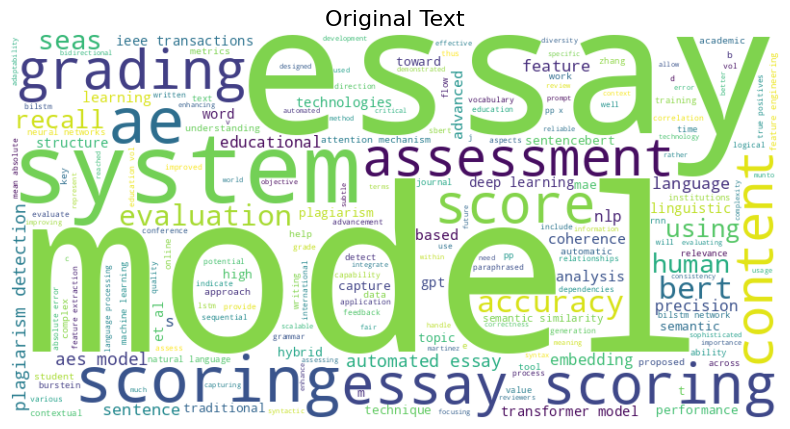

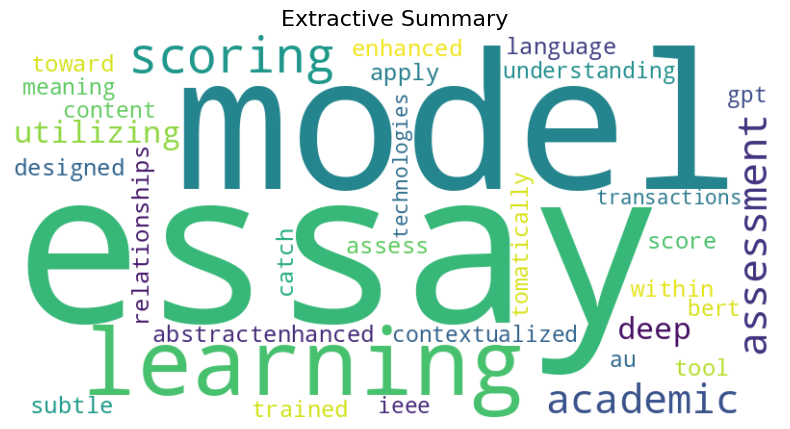

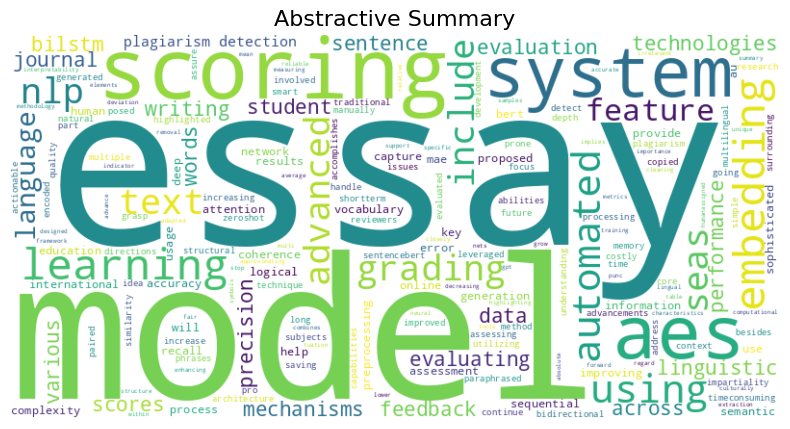

Chunk,Extractive Summary,Abstractive Summary
Chunk 1,enhanced academic assessment model utilizing deep learning for essay scoring abstractenhanced academic assessment model utilizing deep learning for essay scoring was a tool designed to assess and score essays.,The traditional method of manually assessing essays which involved multiple reviewers to assure impartiality had been costly timeconsuming and prone to error. To address these issues a sophisticated automated essay grading system utilizing deep learning and natural language processing nlp technologies has been pro posed. essays had been encoded as sequential embeddings using an advanced technique that leveraged a bidirectional long shortterm memory bilstm network to capture semantic information. the proposed smart essay assessment system had evaluated the essays logical coherence highlighted key phrases and sentences and generated grading results that were simple to grasp. Seas is an online essay evaluation system. It uses semantic similarity models such as sentencebert to detect paraphrased or copied text. It is paired with sequential understanding for an increase in the depth of accuracy in automated grading. besides evaluating structural and linguistic quality seas includes plagiarism detection abilities. It accomplishes not just saving on grading time but actionable feedback to the students for them to be improved in writing. this system will continue its development to include other advancements in nlp such as zeroshot learning and multilingual capabilities to handle more subjects and languages. Bilstm architecture is the core part of our proposed seas. The idea of these networks is to process information in both directions and capture context from surrounding words. The future research in aes is going to focus on increasing the interpretability of the models decreasing computational complexity and enhancing multi lingual support. As deep learning and nlp technologies advance forward aes systems will grow into sophisticated tools designed to provide reliable fair and culturally adapted feedback in regard to the writing of students. The aes framework combines linguistic features with embeddings in neural nets to help feedback mechanisms for improving student writing.
Chunk 2,can be trained to catch subtle relationships within language to apply that toward understanding contextualized meaning in models like bert and gpt.,The seas methodology includes data preprocessing embedding generation model training and evaluation. Models like bert and gpt use attention mechanisms that help in evaluating the relative importance of the words within a sentence. feature extraction includes evaluating linguistic elements such as vocabulary usage sentence complexity and logical using structure. The mean absolute error mae is a key indicator of an aes models scoring precision by measuring the average deviation from humanassigned scores. A lower mae implies that the models scores are more accurate closely approximating human scores across various essay samples. The table provides a. summary of various automated essay scoring aes models highlighting their. specific performance metrics and unique characteristics. a. data preprocessing 1. text cleaning removal of punc tuation stop words and irrelevant symbols. 2. tokenization conversion of text into tokens for embedding generation. 3.embedding using word2vec or glove embeddings text is transformed into numerical vectors that the bilstm and transformer models process. 4. advanced plagiarism detection in aes. with a precision of 0.92 and recall of. 0.87. 5. hybrid approach using bert and feature engineering. This essay scoring model evaluates essays based on vocabulary usage and syntax both applying cnns as well as rnns. it has a precision of 0.89 and recall of0.85 with an aim of coherence and relevance across various topics. The multidimensional scoring scheme of this model enables it to make correct approximations of extremely complex la

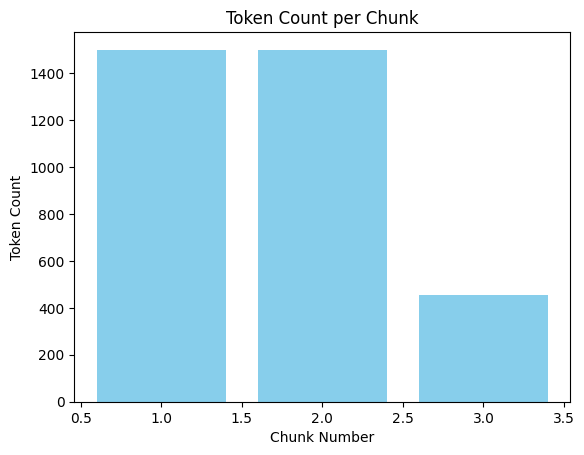

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 49.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 56.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.1 MB/s eta 0:00:00


2025-01-07 07:46:48.853 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 07:46:49.070 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-01-07 07:46:49.072 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 07:46:49.075 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 07:46:49.078 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 07:46:49.079 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 07:46:49.082 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-01-07 07:46:49.083 Thread 'MainThread': mi

In [ ]:
import os
import re
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from transformers import pipeline
from pdfminer.high_level import extract_text

# Download required NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# 1. Dataset Preprocessing
def extract_text_from_pdf(file_path):
    """Extracts text from a PDF file."""
    return extract_text(file_path)

def clean_text(text):
    """Removes special characters and normalizes text."""
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-zA-Z0-9.\?\!\s]', '', text)
    return text.lower()

# 2. Chunking and Feature Extraction
def split_into_chunks(text, chunk_size=1000):
    """Splits the text into chunks of approximately the specified size."""
    words = text.split()
    chunks = [' '.join(words[i:i + chunk_size]) for i in range(0, len(words), chunk_size)]
    return chunks

def get_important_sentences(text, top_n=10):
    """Identifies important sentences using TF-IDF."""
    sentences = sent_tokenize(text)
    vectorizer = TfidfVectorizer(stop_words='english')
    vectors = vectorizer.fit_transform(sentences)
    scores = vectors.sum(axis=1).flatten().tolist()
    sentence_scores = [(score, sentence) for score, sentence in zip(scores, sentences)]
    sentence_scores.sort(key=lambda x: x[0], reverse=True)
    summary = [sentence for _, sentence in sentence_scores[:top_n]]  # Top N sentences
    return ' '.join(summary)

# 3. Abstractive Summarization
def abstractive_summarizer(text, model_name='facebook/bart-large-cnn', max_chunk_size=512):
    """Summarizes text using a pre-trained transformer model."""
    summarizer = pipeline("summarization", model=model_name, device=0)  # Use CPU or GPU
    sentences = sent_tokenize(text)

    # Split sentences into chunks fitting within the model's token limit
    chunks = []
    current_chunk = []
    current_length = 0

    for sentence in sentences:
        sentence_length = len(sentence.split())
        if current_length + sentence_length <= max_chunk_size:
            current_chunk.append(sentence)
            current_length += sentence_length
        else:
            chunks.append(" ".join(current_chunk))
            current_chunk = [sentence]
            current_length = sentence_length

    if current_chunk:  # Add any remaining sentences as the last chunk
        chunks.append(" ".join(current_chunk))

    # Summarize each chunk and combine results
    summaries = []
    for i, chunk in enumerate(chunks):
        print(f"Processing Chunk {i + 1}: {chunk[:200]}...")
        try:
            summary = summarizer(chunk, max_length=300, min_length=100, do_sample=False)
            summaries.append(summary[0]['summary_text'])
        except Exception as e:
            print(f"Error in chunk {i + 1}: {e}")
            summaries.append(f"Error summarizing chunk {i + 1}: {e}")

    return " ".join(summaries)

# Main Execution
#def main():
pdf_file_path = "507 Submission                                                                   .pdf"  # Replace with your file path

# Step 1: Extract and Clean Text
raw_text = extract_text_from_pdf(pdf_file_path)
cleaned_text = clean_text(raw_text)

# Step 2: Chunk and Summarize
chunks = split_into_chunks(cleaned_text, chunk_size=1500)
extractive_summary = []
abstractive_summary = []

for i, chunk in enumerate(chunks):
    print(f"\nProcessing Chunk {i + 1}:\n")
    extractive_summary.append(get_important_sentences(chunk, top_n=15))
    abstractive_summary.append(abstractive_summarizer(chunk))
    print("="*50)
    print(f"Chunk {i+1}:")
    print(f"Word Count: {len(chunk.split())}")
    print(f"Extractive Summary:\n{extractive_summary[-1]}")
    print(f"Abstractive Summary:\n{abstractive_summary[-1]}")
    print("="*50)

# Combine Extractive and Abstractive Summaries into Paragraph
combined_summary = " ".join([
    f"{extractive} {abstract}"
    for extractive, abstract in zip(extractive_summary, abstractive_summary)
])

# Print the final summary as a paragraph
print("\nFinal Combined Summary:\n")
print(combined_summary)
print("="*50)

from wordcloud import WordCloud
import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Generate word clouds for original text and summaries
generate_wordcloud(cleaned_text, "Original Text")
generate_wordcloud(" ".join(extractive_summary), "Extractive Summary")
generate_wordcloud(" ".join(abstractive_summary), "Abstractive Summary")
from IPython.display import display, HTML

def display_summary_table(chunks, extractive_summaries, abstractive_summaries):
    table = "<table><tr><th>Chunk</th><th>Extractive Summary</th><th>Abstractive Summary</th></tr>"
    for i, (chunk, ext_sum, abs_sum) in enumerate(zip(chunks, extractive_summaries, abstractive_summaries)):
        table += f"<tr><td>Chunk {i+1}</td><td>{ext_sum}</td><td>{abs_sum}</td></tr>"
    table += "</table>"
    display(HTML(table))

# Display summaries in a table
display_summary_table(chunks, extractive_summary, abstractive_summary)
import matplotlib.pyplot as plt

# Token counts per chunk
token_counts = [len(chunk.split()) for chunk in chunks]

plt.bar(range(1, len(token_counts) + 1), token_counts, color='skyblue')
plt.xlabel("Chunk Number")
plt.ylabel("Token Count")
plt.title("Token Count per Chunk")
plt.show()
!pip install streamlit
import streamlit as st

st.title("Text Summarization Tool")
uploaded_file = st.file_uploader("Upload a PDF file", type="pdf")

if uploaded_file:
    raw_text = extract_text_from_pdf(uploaded_file)
    cleaned_text = clean_text(raw_text)
    chunks = split_into_chunks(cleaned_text, chunk_size=1500)

    extractive_summary = [get_important_sentences(chunk, top_n=10) for chunk in chunks]
    abstractive_summary = [abstractive_summarizer(chunk) for chunk in chunks]

    st.write("## Extractive Summaries")
    for i, summary in enumerate(extractive_summary):
        st.write(f"**Chunk {i+1}:** {summary}")

    st.write("## Abstractive Summaries")
    for i, summary in enumerate(abstractive_summary):
        st.write(f"**Chunk {i+1}:** {summary}")


#if __name__ == "__main__":
#    main()